In [104]:
# import libraries
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [103]:
from google.colab import files
uploaded = files.upload() 


Saving iris.csv to iris (8).csv


In [115]:
# load iris dataset 
iris = pd.read_csv('iris (8).csv')

# check the shape of the dataset
iris.shape

# print column names of the dataset
col_list = iris.columns
print(type(col_list))
print(col_list[:])

# print the count of each species in the dataset
iris['variety'].value_counts()

# select the feature variables and the target variable
iris_data = iris.iloc[:,0:4] # select all the rows and col indices 0 to 3
iris_lables = iris.iloc[:,4:] # select all trhe rows and 4th cloumn

# check the shape of the feature and target variables
iris_data.shape
iris_data.head(2)


<class 'pandas.core.indexes.base.Index'>
Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')


,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [116]:
iris_lables.shape
iris_lables.head(2)

,variety
0,Iris-setosa
1,Iris-setosa


In [117]:
#standardizing using sklearn pre-processing
iris_standard = StandardScaler().fit_transform(iris_data)  # this has transformed dataframe to numpy N-dimensional array,
#each row in df is a list we will have n inner lists in a outer list,thats why length of iris_standard is 150 and 
#length of each inner list is 4.
print('length of iris_standard is ',len(iris_standard))
print('length of inner list is',len(iris_standard[0]))
print('sample elements are')
print((iris_standard[0:3]))

length of iris_standard is  150
length of inner list is 4
sample elements are
[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]]


In [118]:
#splitting dataset into train and test


iris_lables_np = iris_lables.values.reshape(1,150)
x_train, x_test, y_train, y_test = train_test_split(iris_standard, iris_lables_np[0], test_size=0.33, random_state=42)
print(x_test[0:2],y_test[0:2])
print(len(x_test),len(y_test))
print(len(x_train),len(y_train))

[[ 0.31099753 -0.58776353  0.53529583  0.00175297]
 [-0.17367395  1.72626612 -1.17067529 -1.18150376]] ['Iris-versicolor' 'Iris-setosa']
50 50
100 100


In [120]:
#Training using K_NN

neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(x_train, y_train) 


KNeighborsClassifier()

In [110]:
#predicting

predict_array = neigh.predict(x_test)
print(metrics.accuracy_score(y_test, predict_array))
#print(predict_array[0])
#print(y_test[0])

for i in range(len(predict_array)):
   if (predict_array[i] != y_test[i]):
       print('actual is {} but predicted is {}'.format(y_test[i],predict_array[i]))
       print('Wrong')

0.98
actual is Iris-virginica but predicted is Iris-versicolor
Wrong


In [111]:
#prediction on non standardized data
x_train, x_test, y_train, y_test = train_test_split(iris_data, iris_lables_np[0], test_size=0.33, random_state=42)
neigh2 = KNeighborsClassifier(n_neighbors=5)
neigh2.fit(x_train, y_train) 
predict_array = neigh2.predict(x_test)
print(metrics.accuracy_score(y_test, predict_array))

0.98


5
[0.9400000000000001, 0.9400000000000001, 0.9400000000000001, 0.9400000000000001, 0.9400000000000001]
(1, 0.9400000000000001)
(3, 0.9400000000000001)
(5, 0.9400000000000001)
(7, 0.9400000000000001)
(9, 0.9400000000000001)


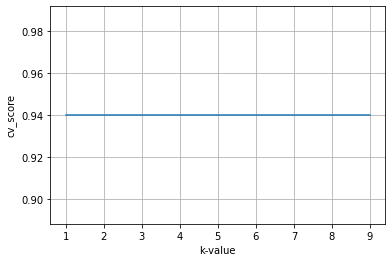

0.98
0.96


In [112]:
#cross validation using 10 folds,cv=10

k_list= [1,3,5,7,9]
cv_scores=[]

for i in k_list:
    cross_neigh = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(cross_neigh,x_train, y_train,cv=10)
    cv_scores.append(np.mean(scores))

print(len(cv_scores))
print(cv_scores)

cv_score_zip=zip(k_list,cv_scores)

for i in cv_score_zip:
    print(i)
    
#plot for K-value and accuracy using 10 fold cv.
plt.figure('Iris_KNN')
plt.xlabel('k-value')
plt.ylabel('cv_score')
plt.grid()
plt.plot(k_list,cv_scores)
plt.show()

# based on above observations we are getting maximum accuracy when k=7,
#So we will use K-value 7 and predict on test datsset and see accuracy.

neigh_K7 = KNeighborsClassifier(n_neighbors=7)
neigh_K7.fit(x_train, y_train)
predict_array_k7 = neigh_K7.predict(x_test)
print(metrics.accuracy_score(y_test, predict_array_k7))
predict_probability = neigh_K7.predict_proba(x_test)

#zipped_pobability = zip(predict_array_k7,predict_probability)
#for i in zipped_pobability:
#    print(i)

cross_predict = cross_val_predict(cross_neigh,x_test,y_test,cv=10)
print(metrics.accuracy_score(y_test, cross_predict))




In [113]:
#confusion matrix and classification_report
#precision = TP/TP+FP
#Recall = TP/TP+FN

print(metrics.confusion_matrix(y_test, cross_predict))
print(metrics.classification_report(y_test, cross_predict))

[[19  0  0]
 [ 0 15  0]
 [ 0  2 14]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.88      1.00      0.94        15
 Iris-virginica       1.00      0.88      0.93        16

       accuracy                           0.96        50
      macro avg       0.96      0.96      0.96        50
   weighted avg       0.96      0.96      0.96        50

